In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
raddar_chest_xrays_indiana_university_path = kagglehub.dataset_download('raddar/chest-xrays-indiana-university')

print('Data source import complete.')


Using Colab cache for faster access to the 'chest-xrays-indiana-university' dataset.
Data source import complete.


In [2]:
import os
for i in os.walk("/kaggle/input/chest-xrays-indiana-university"):
    print(i)
    break

('/kaggle/input/chest-xrays-indiana-university', ['images'], ['indiana_projections.csv', 'indiana_reports.csv'])


In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "indiana_reports.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "raddar/chest-xrays-indiana-university",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-746152115.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'chest-xrays-indiana-university' dataset.
First 5 records:    uid                                               MeSH  \
0    1                                             normal   
1    2  Cardiomegaly/borderline;Pulmonary Artery/enlarged   
2    3                                             normal   
3    4  Pulmonary Disease, Chronic Obstructive;Bullous...   
4    5  Osteophyte/thoracic vertebrae/multiple/small;T...   

                                            Problems  \
0                                             normal   
1                      Cardiomegaly;Pulmonary Artery   
2                                             normal   
3  Pulmonary Disease, Chronic Obstructive;Bullous...   
4                         Osteophyte;Thickening;Lung   

                                               image  \
0                          Xray Chest PA and Lateral   
1                Chest, 2 views, frontal and lateral   
2                         

In [4]:
# Load the data using kagglehub.load_dataset as it seems more reliable in this environment.
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "indiana_reports.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "raddar/chest-xrays-indiana-university",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# Display the first few rows to confirm it loaded correctly
display(df.head())

/tmp/ipython-input-2002413479.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'chest-xrays-indiana-university' dataset.


,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [5]:
df.dropna(subset={'findings','impression'},inplace=True)

In [6]:
df['report']=df['findings']+' '+df['impression']

In [7]:
import re
def f(s):
    s=s.lower()
    s = re.sub(r"[^a-z.,]", " ", s)
    s = re.sub(r"\.+",".",s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

In [8]:
df.report=df.report.apply(f)

In [9]:
df.report.iloc[0]

'the cardiac silhouette and mediastinum size are within normal limits. there is no pulmonary edema. there is no focal consolidation. there are no xxxx of a pleural effusion. there is no evidence of pneumothorax. normal chest x xxxx.'

In [10]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Set the path to the file you'd like to load
file_path = "indiana_projections.csv"

# Load the latest version
proj_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "raddar/chest-xrays-indiana-university",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

display(proj_df)

/tmp/ipython-input-2898773493.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  proj_df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'chest-xrays-indiana-university' dataset.


,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal
...,...,...,...
7461,3997,3997_IM-2048-1002.dcm.png,Lateral
7462,3998,3998_IM-2048-1001.dcm.png,Frontal
7463,3998,3998_IM-2048-1002.dcm.png,Lateral
7464,3999,3999_IM-2049-1001.dcm.png,Frontal


In [11]:
df=pd.merge(df,proj_df,how='inner',on='uid')

In [12]:
df=df[df['projection']=='Frontal']
df

,uid,MeSH,Problems,image,indication,comparison,findings,impression,report,filename,projection
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,the cardiac silhouette and mediastinum size ar...,1_IM-0001-4001.dcm.png,Frontal
2,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,borderline cardiomegaly. midline sternotomy xx...,2_IM-0652-1001.dcm.png,Frontal
4,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...,there are diffuse bilateral interstitial and a...,4_IM-2050-1001.dcm.png,Frontal
6,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.,the cardiomediastinal silhouette and pulmonary...,5_IM-2117-1003002.dcm.png,Frontal
8,6,normal,normal,"PA and Lateral Chest. XXXX, XXXX at XXXX",Evaluate for infection,"XXXX, XXXX",Heart size and mediastinal contour are within ...,No acute cardiopulmonary findings.,heart size and mediastinal contour are within ...,6_IM-2192-1001.dcm.png,Frontal
...,...,...,...,...,...,...,...,...,...,...,...
6447,3993,Cardiomegaly/mild;Diaphragm/left/elevated,Cardiomegaly;Diaphragm,CHEST 2V FRONTAL/LATERAL,Edema,NaN,The heart is mildly enlarged. Left hemidiaphra...,Borderline cardiomegaly without acute disease.,the heart is mildly enlarged. left hemidiaphra...,3993_IM-2044-1001.dcm.png,Frontal
6449,3994,Cardiomegaly/mild;Pulmonary Congestion;Heart F...,Cardiomegaly;Pulmonary Congestion;Heart Failure,2 view ( PA and lateral) chest radiograph date...,"XXXX-year-old male with chest pain, positive t...","Portable chest x-XXXX XXXX, XXXX",Similar mild cardiomegaly. Of the pulmonary va...,Mild cardiomegaly with XXXX of early failure.,similar mild cardiomegaly. of the pulmonary va...,3994_IM-2045-2001.dcm.png,Frontal
6451,3995,Lung/hyperdistention/mild;Diaphragm/bilateral/...,Lung;Diaphragm;Cicatrix;Pulmonary Atelectasis;...,Xray Chest PA and Lateral,"Nausea, vomiting x2 weeks. Dialysis patient.","XXXX, XXXX.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...,the cardiomediastinal silhouette and pulmonary...,3995_IM-2046-1001.dcm.png,Frontal
6453,3996,Spine/degenerative,Spine,Xray Chest PA and Lateral,NaN,None.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...,the lungs are clear. heart size is normal. no ...,3996_IM-2047-1001.dcm.png,Frontal


In [13]:
import nltk
from collections import Counter

# Download the necessary NLTK data if not already present
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


text=" ".join(df['report'])
tokens=nltk.word_tokenize(text)
counterr=Counter(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [14]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
word2idx = {"<PAD>": 0, "<UNK>": 1, "<SOS>": 2, "<EOS>": 3}
j = 4
for i in counterr.keys():
    word2idx[i]=j
    j+=1

In [16]:
class Tokenizer:
    def __init__(self, word2idx):
        self.word2idx = word2idx
        self.idx2word = {v: k for k, v in word2idx.items()}
        self.pad_token = "<PAD>"
        self.unk_token = "<UNK>"
        self.sos_token = "<SOS>"
        self.eos_token = "<EOS>"

        self.pad_id = self.word2idx[self.pad_token]
        self.unk_id = self.word2idx[self.unk_token]
        self.sos_id = self.word2idx[self.sos_token]
        self.eos_id = self.word2idx[self.eos_token]

        self.vocab_size = len(word2idx)

    def encode(self, sentence, add_special_tokens=True):
        tokens = nltk.word_tokenize(sentence.lower())
        token_ids = [self.word2idx.get(token, self.unk_id) for token in tokens]

        if add_special_tokens:
            token_ids = [self.sos_id] + token_ids + [self.eos_id]
        return token_ids

    def decode(self, token_ids, skip_special_tokens=True):
        words = []
        for idx in token_ids:
            word = self.idx2word.get(idx, self.unk_token)
            if skip_special_tokens and word in {self.pad_token, self.sos_token, self.eos_token}:
                continue
            words.append(word)
        return " ".join(words)

In [17]:
tokenizer = Tokenizer(word2idx)

sentence = "lungs are clear"
encoded = tokenizer.encode(sentence)
print(encoded)  # e.g. [2, 123, 45, 3]

decoded = tokenizer.decode(encoded)
print(decoded)  # 'lungs are clear'

[2, 38, 10, 37, 3]
lungs are clear


In [18]:
df["sequence"]=df["report"].apply(tokenizer.encode)
df.head(2)

,uid,MeSH,Problems,image,indication,comparison,findings,impression,report,filename,projection,sequence
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,the cardiac silhouette and mediastinum size ar...,1_IM-0001-4001.dcm.png,Frontal,"[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ..."
2,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,borderline cardiomegaly. midline sternotomy xx...,2_IM-0652-1001.dcm.png,Frontal,"[2, 31, 32, 14, 33, 34, 22, 14, 35, 18, 36, 14..."


In [19]:
row=df.iloc[0]
tokenizer.decode(row.sequence)

'the cardiac silhouette and mediastinum size are within normal limits . there is no pulmonary edema . there is no focal consolidation . there are no xxxx of a pleural effusion . there is no evidence of pneumothorax . normal chest x xxxx .'

In [20]:
lengths=[len(i) for i in df['sequence']]

<Axes: >

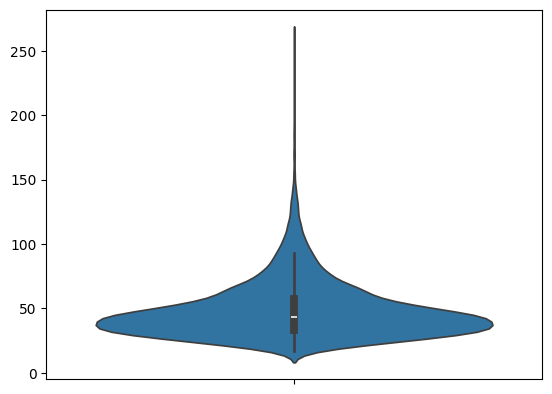

In [21]:
import seaborn as sns
sns.violinplot(lengths)

In [22]:
sum([i>100 for i in lengths])

112

In [23]:
seq_len=100
def pad_and_trim(seq):
    # Truncate if longer
    if len(seq) > seq_len:
        seq = seq[:seq_len-1] + [tokenizer.eos_id]
        return seq
    else:
        return seq + [tokenizer.pad_id] * (seq_len - len(seq))
df.sequence=df.sequence.apply(pad_and_trim)

In [24]:
df['path']="/kaggle/input/chest-xrays-indiana-university/images/images_normalized/"+df['filename']
df.head(2)

,uid,MeSH,Problems,image,indication,comparison,findings,impression,report,filename,projection,sequence,path
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,the cardiac silhouette and mediastinum size ar...,1_IM-0001-4001.dcm.png,Frontal,"[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",/kaggle/input/chest-xrays-indiana-university/i...
2,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,borderline cardiomegaly. midline sternotomy xx...,2_IM-0652-1001.dcm.png,Frontal,"[2, 31, 32, 14, 33, 34, 22, 14, 35, 18, 36, 14...",/kaggle/input/chest-xrays-indiana-university/i...


In [25]:
import matplotlib.pyplot as plt
from PIL import Image
def visualize(img,report,generated_report=None):
    if type(img)==str:
        img=Image.open(img)
    plt.imshow(img,cmap="gray")
    plt.axis('off')
    plt.show()
    print("Report :",report)
    if generated_report:
        print("Generated Report :",generated_report)

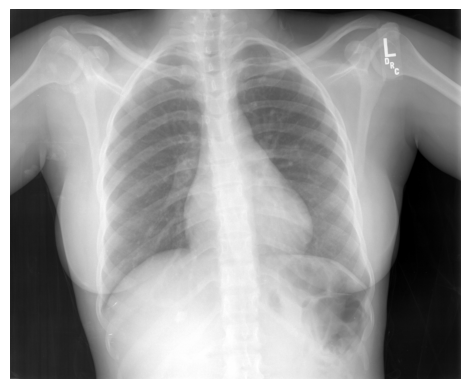

Report : the cardiac silhouette and mediastinum size are within normal limits. there is no pulmonary edema. there is no focal consolidation. there are no xxxx of a pleural effusion. there is no evidence of pneumothorax. normal chest x xxxx.


In [26]:
row=df.iloc[0]
visualize(row['path'],row['report'])

In [27]:
from sklearn.model_selection import train_test_split
train_df,temp=train_test_split(df,test_size=0.2)
test_df,val_df=train_test_split(temp,test_size=0.5)
print(len(train_df),len(test_df),len(val_df))

2640 330 331


=================================

In [28]:
pip download rouge-score


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.0/802.0 kB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.9 MB/s eta 0:00:00
Saved ./rouge_score-0.1.2.tar.gz
Saved ./six-1.17.0-py2.py3-none-any.whl
Saved ./absl_py-2.3.1-py3-none-any.whl
Saved ./nltk-3.9.1-py3-none-any.whl
Saved ./nump

In [29]:
!pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.3 MB/s eta 0:00:00


In [30]:
!pip install rouge_score

  Using cached rouge_score-0.1.2.tar.gz (17 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=a834c23dfd805f8ed6459c37c66aee1aea620353ad2d5a9bd566ee5080bc48cb
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score


In [31]:
import numpy as np
import pandas as pd
import os
import re
import nltk
import math
from collections import Counter
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import textwrap
import random
from tqdm import tqdm
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score
from rouge_score import rouge_scorer
from bert_score import score as bert_scorer
import copy

In [32]:
# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [33]:
# Dataset Loading
def load_dataset(data_dir, reports_csv, projections_csv=None):
    df = pd.read_csv(os.path.join(data_dir, reports_csv))
    if projections_csv:
        proj_df = pd.read_csv(os.path.join(data_dir, projections_csv))
        df = pd.merge(df, proj_df, how='inner', on='uid')
        df = df[df['projection'] == 'Frontal']  # Filter for frontal views (modify if needed)
    df.dropna(subset=['findings', 'impression'], inplace=True)
    df['report'] = df['findings'] + ' ' + df['impression']
    return df

In [34]:
# Text Preprocessing
def clean_text(s):
    s = s.lower()
    s = re.sub(r"[^a-z.,]", " ", s)
    s = re.sub(r"\.+", ".", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

In [35]:
# Build Vocabulary
def build_vocabulary(reports):
    text = " ".join(reports)
    tokens = nltk.word_tokenize(text)
    counter = Counter(tokens)
    word2idx = {"<PAD>": 0, "<UNK>": 1, "<SOS>": 2, "<EOS>": 3}
    j = 4
    for word in counter.keys():
        word2idx[word] = j
        j += 1
    return word2idx

In [36]:
# Tokenizer Class
class Tokenizer:
    def __init__(self, word2idx):
        self.word2idx = word2idx
        self.idx2word = {v: k for k, v in word2idx.items()}
        self.pad_token = "<PAD>"
        self.unk_token = "<UNK>"
        self.sos_token = "<SOS>"
        self.eos_token = "<EOS>"
        self.pad_id = self.word2idx[self.pad_token]
        self.unk_id = self.word2idx[self.unk_token]
        self.sos_id = self.word2idx[self.sos_token]
        self.eos_id = self.word2idx[self.eos_token]
        self.vocab_size = len(word2idx)

In [37]:
def encode(self, sentence, add_special_tokens=True):
        tokens = nltk.word_tokenize(sentence.lower())
        token_ids = [self.word2idx.get(token, self.unk_id) for token in tokens]
        if add_special_tokens:
            token_ids = [self.sos_id] + token_ids + [self.eos_id]
        return token_ids

In [38]:
def decode(self, token_ids, skip_special_tokens=True):
        words = []
        for idx in token_ids:
            word = self.idx2word.get(idx, self.unk_token)
            if skip_special_tokens and word in {self.pad_token, self.sos_token, self.eos_token}:
                continue
            words.append(word)
        return " ".join(words)

In [39]:
# Image Preprocessing
img_size = (512, 512)
train_transforms = transforms.Compose([
    transforms.Resize(img_size),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.02),
    transforms.RandomResizedCrop(img_size, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])
image_transforms = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [40]:
# Custom Dataset
class MedicalImageDataset(Dataset):
    def __init__(self, image_paths, captions_seq, transform=None):
        self.image_paths = image_paths
        self.captions_seq = captions_seq
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")  # Convert to RGB for compatibility
        if self.transform:
            image = self.transform(image)
        caption_seq = self.captions_seq[idx]
        return image, torch.tensor(caption_seq, dtype=torch.long)

In [41]:
# Image Encoder
class ImageEncoder(nn.Module):
    def __init__(self, embed_dim=512):
        super(ImageEncoder, self).__init__()
        effnet = models.efficientnet_b4(pretrained=True)
        self.backbone = effnet.features
        for param in self.backbone[:-2].parameters():
            param.requires_grad = False
        for param in self.backbone[-2:].parameters():
            param.requires_grad = True
        self.pool = nn.AdaptiveAvgPool2d((7, 7))
        self.flatten = nn.Flatten(2)
        self.transpose = lambda x: x.permute(0, 2, 1)
        self.project = nn.Linear(1792, embed_dim)

    def forward(self, x):
        x = self.backbone(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.transpose(x)
        x = self.project(x)
        return x

In [42]:
# Transformer Encoder Block
class TransformerEncoderBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.1):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout, batch_first=True)
        self.ff = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attn_output, _ = self.self_attn(x, x, x)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.ff(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

In [43]:
class TransformerDecoderBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.1):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout, batch_first=True)
        self.cross_attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout, batch_first=True)
        self.ff = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.norm3 = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, enc_out, tgt_mask=None):
        # Masked self-attention
        _x = self.norm1(x + self.dropout(self.self_attn(x, x, x, attn_mask=tgt_mask)[0]))
        # Cross-attention
        _x = self.norm2(_x + self.dropout(self.cross_attn(_x, enc_out, enc_out)[0]))
        # Feedforward
        out = self.norm3(_x + self.dropout(self.ff(_x)))
        return out


In [44]:
# Transformer Decoder Block
class TransformerDecoderBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.1):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout, batch_first=True)
        self.cross_attn = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout, batch_first=True)
        self.ff = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.norm3 = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, enc_out, tgt_mask=None):
        _x = self.norm1(x + self.dropout(self.self_attn(x, x, x, attn_mask=tgt_mask)[0]))
        _x = self.norm2(_x + self.dropout(self.cross_attn(_x, enc_out, enc_out)[0]))
        out = self.norm3(_x + self.dropout(self.ff(_x)))
        return out

In [45]:
# Positional Embedding
class PositionalEmbedding(nn.Module):
    def __init__(self, vocab_size, max_len, embed_dim):
        super().__init__()
        self.token_embedding = nn.Embedding(vocab_size, embed_dim)
        self.position_embedding = nn.Embedding(max_len, embed_dim)

    def forward(self, x):
        positions = torch.arange(0, x.size(1), device=x.device).unsqueeze(0)
        pos_embed = self.position_embedding(positions)
        tok_embed = self.token_embedding(x)
        return tok_embed + pos_embed

In [46]:
# Caption Decoder
class CaptionDecoder(nn.Module):
    def __init__(self, vocab_size, embed_dim, ff_dim, num_heads, max_len, num_layers):
        super().__init__()
        self.pos_embed = PositionalEmbedding(vocab_size, max_len, embed_dim)
        self.dec_layers = nn.ModuleList([
            TransformerDecoderBlock(embed_dim, num_heads, ff_dim)
            for _ in range(num_layers)
        ])
        self.output_proj = nn.Linear(embed_dim, vocab_size)

    def make_causal_mask(self, size):
        return torch.triu(torch.ones(size, size), diagonal=1).bool()

    def forward(self, tgt, enc_out):
        x = self.pos_embed(tgt)
        B, T, _ = x.shape
        mask = self.make_causal_mask(T).to(x.device)
        for layer in self.dec_layers:
            x = layer(x, enc_out, tgt_mask=mask)
        logits = self.output_proj(x)
        return logits

In [47]:
# Full Model
import math
class ImageCaptioningModel(nn.Module):
    def __init__(self, cnn_encoder, transformer_encoder, decoder, tokenizer):
        super().__init__()
        self.cnn_encoder = cnn_encoder
        self.transformer_encoder = transformer_encoder
        self.decoder = decoder
        self.tokenizer = tokenizer

    def forward(self, images, captions):
        img_features = self.cnn_encoder(images)
        encoded_img = self.transformer_encoder(img_features)
        logits = self.decoder(captions, encoded_img)
        return logits

    def generate(self, image, max_length=100, beam_width=3, device='cuda', length_penalty=0.7):
        self.eval()
        with torch.no_grad():
            image = image.unsqueeze(0).to(device)
            img_features = self.cnn_encoder(image)
            encoded_img = self.transformer_encoder(img_features)
            beam = [([self.tokenizer.sos_id], 0.0)]
            for _ in range(max_length):
                candidates = []
                for seq, score in beam:
                    if seq[-1] == self.tokenizer.eos_id:
                        candidates.append((seq, score))
                        continue
                    input_ids = torch.tensor(seq).unsqueeze(0).to(device)
                    logits = self.decoder(input_ids, encoded_img)
                    probs = torch.softmax(logits[0, -1, :], dim=-1)
                    topk_probs, topk_ids = probs.topk(beam_width)
                    for prob, idx in zip(topk_probs, topk_ids):
                        new_seq = seq + [idx.item()]
                        new_score = score + math.log(prob.item() + 1e-12)
                        candidates.append((new_seq, new_score))
                beam = sorted(candidates, key=lambda x: x[1] / ((len(x[0]) ** length_penalty) if length_penalty > 0 else 1), reverse=True)[:beam_width]
                if all(seq[-1] == self.tokenizer.eos_id for seq, _ in beam):
                    break
            best_seq = beam[0][0]
            return self.tokenizer.decode(best_seq, skip_special_tokens=True)

In [48]:
# Loss Function
def caption_loss_fn(logits, targets, pad_token_id):
    logits = logits.view(-1, logits.size(-1))
    targets = targets.reshape(-1)
    loss = F.cross_entropy(logits, targets, ignore_index=pad_token_id, label_smoothing=0.1)
    return loss

# Training Function
def train_one_epoch(model, dataloader, optimizer, pad_token_id, device):
    model.train()
    total_loss = 0
    for images, captions in tqdm(dataloader):
        images, captions = images.to(device), captions.to(device)
        inputs = captions[:, :-1]
        targets = captions[:, 1:]
        optimizer.zero_grad()
        logits = model(images, inputs)
        loss = caption_loss_fn(logits, targets, pad_token_id)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

In [49]:
# Evaluation Function
def evaluate_loss(model, dataloader, pad_token_id, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for images, captions in tqdm(dataloader):
            images, captions = images.to(device), captions.to(device)
            inputs = captions[:, :-1]
            targets = captions[:, 1:]
            logits = model(images, inputs)
            loss = caption_loss_fn(logits, targets, pad_token_id)
            total_loss += loss.item()
    return total_loss / len(dataloader)

In [50]:
# Metrics Evaluation
def evaluate_model(model, dataloader, tokenizer, device):
    model.eval()
    references = []
    hypotheses = []
    print("Generating predictions on the test set...")
    with torch.no_grad():
        for images, captions_seq in tqdm(dataloader):
            images = images.to(device)
            for i in range(images.size(0)):
                image = images[i]
                generated_caption = model.generate(image, max_length=100, device=device)
                hypotheses.append(generated_caption)
            for seq in captions_seq:
                ref_caption = tokenizer.decode(seq.tolist(), skip_special_tokens=True)
                references.append(ref_caption)
    print(f"\nGenerated {len(hypotheses)} hypotheses.")
    bleu_scores = {'bleu_1': 0, 'bleu_2': 0, 'bleu_3': 0, 'bleu_4': 0}
    for ref, hyp in zip(references, hypotheses):
        ref_tokens = [nltk.word_tokenize(ref)]
        hyp_tokens = nltk.word_tokenize(hyp)
        bleu_scores['bleu_1'] += sentence_bleu(ref_tokens, hyp_tokens, weights=(1, 0, 0, 0))
        bleu_scores['bleu_2'] += sentence_bleu(ref_tokens, hyp_tokens, weights=(0, 1, 0, 0))
        bleu_scores['bleu_3'] += sentence_bleu(ref_tokens, hyp_tokens, weights=(0, 0, 1, 0))
        bleu_scores['bleu_4'] += sentence_bleu(ref_tokens, hyp_tokens, weights=(0, 0, 0, 1))
    for k in bleu_scores:
        bleu_scores[k] /= len(hypotheses)
    meteor_total = 0
    for ref, hyp in zip(references, hypotheses):
        ref_tokens = nltk.word_tokenize(ref)
        hyp_tokens = nltk.word_tokenize(hyp)
        meteor_total += meteor_score([ref_tokens], hyp_tokens)
    meteor_avg = meteor_total / len(hypotheses)
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_scores = {'rouge1': 0, 'rouge2': 0, 'rougeL': 0}
    for ref, hyp in zip(references, hypotheses):
        scores = scorer.score(ref, hyp)
        rouge_scores['rouge1'] += scores['rouge1'].fmeasure
        rouge_scores['rouge2'] += scores['rouge2'].fmeasure
        rouge_scores['rougeL'] += scores['rougeL'].fmeasure
    for k in rouge_scores:
        rouge_scores[k] /= len(hypotheses)
    P, R, F1 = bert_scorer(hypotheses, references, lang="en", model_type='distilbert-base-uncased', device=device)
    bertscore_avg = F1.mean().item()
    return {**bleu_scores, 'meteor': meteor_avg, **rouge_scores, 'bert_score': bertscore_avg}

In [51]:
# Visualization
def visualize_result(img_path, true_report, generated_report, title="Model Prediction"):
    img = Image.open(img_path).convert("RGB")
    plt.figure(figsize=(12, 6))
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    wrapped_true = textwrap.fill(f"Ground Truth: {true_report}", width=100)
    wrapped_gen = textwrap.fill(f"Generated: {generated_report}", width=100)
    plt.title(title, fontsize=14, pad=20)
    plt.figtext(0.5, 0.01, f"{wrapped_true}\n\n{wrapped_gen}",
                ha="center", va="bottom", fontsize=12, wrap=True, bbox={"facecolor":"white", "alpha":0.7, "pad":5})
    plt.show()

In [52]:
def show_random_test_examples(model, test_df, tokenizer, image_transforms, device, num_examples=3):
    model.eval()
    random_indices = random.sample(range(len(test_df)), num_examples)
    for i, idx in enumerate(random_indices):
        sample_row = test_df.iloc[idx]
        img_path = sample_row['path']
        true_report = sample_row['report']
        image_pil = Image.open(img_path).convert("RGB")
        image_tensor = image_transforms(image_pil).unsqueeze(0).to(device)
        print(f"--- Example {i+1}/{num_examples} ---")
        with torch.no_grad():
            generated_report = model.generate(image_tensor.squeeze(0), max_length=100, device=device)
        visualize_result(img_path, true_report, generated_report, title=f"Test Example {i+1}")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B4_Weights.IMAGENET1K_V1`. You can also use `weight

Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-23ab8bcd.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b4_rwightman-23ab8bcd.pth


100%|██████████| 74.5M/74.5M [00:00<00:00, 88.3MB/s]
100%|██████████| 10/10 [00:26<00:00,  2.65s/it]


Saving best model...
Epoch 1, Train Loss: 4.9009, Val Loss: 3.9201


100%|██████████| 10/10 [00:26<00:00,  2.65s/it]


Saving best model...
Epoch 2, Train Loss: 3.6026, Val Loss: 3.4271


100%|██████████| 10/10 [00:26<00:00,  2.68s/it]


Saving best model...
Epoch 3, Train Loss: 3.2375, Val Loss: 3.2045


100%|██████████| 10/10 [00:26<00:00,  2.66s/it]


Saving best model...
Epoch 4, Train Loss: 3.0176, Val Loss: 3.0759


100%|██████████| 10/10 [00:25<00:00,  2.59s/it]


Saving best model...
Epoch 5, Train Loss: 2.8791, Val Loss: 2.9843


100%|██████████| 10/10 [00:25<00:00,  2.54s/it]


Saving best model...
Epoch 6, Train Loss: 2.7688, Val Loss: 2.9278


100%|██████████| 10/10 [00:26<00:00,  2.61s/it]


Saving best model...
Epoch 7, Train Loss: 2.6743, Val Loss: 2.8799


100%|██████████| 10/10 [00:26<00:00,  2.65s/it]


Saving best model...
Epoch 8, Train Loss: 2.5910, Val Loss: 2.8444


100%|██████████| 10/10 [00:25<00:00,  2.59s/it]


Saving best model...
Epoch 9, Train Loss: 2.5178, Val Loss: 2.8191


100%|██████████| 10/10 [00:26<00:00,  2.66s/it]


Saving best model...
Epoch 10, Train Loss: 2.4484, Val Loss: 2.8012


100%|██████████| 10/10 [00:26<00:00,  2.64s/it]


Saving best model...
Epoch 11, Train Loss: 2.3893, Val Loss: 2.7909


100%|██████████| 10/10 [00:26<00:00,  2.63s/it]


Saving best model...
Epoch 12, Train Loss: 2.3257, Val Loss: 2.7806


100%|██████████| 10/10 [00:26<00:00,  2.66s/it]


Saving best model...
Epoch 13, Train Loss: 2.2725, Val Loss: 2.7763


100%|██████████| 10/10 [00:26<00:00,  2.60s/it]


Saving best model...
Epoch 14, Train Loss: 2.2174, Val Loss: 2.7739


100%|██████████| 10/10 [00:26<00:00,  2.62s/it]


Saving best model...
Epoch 15, Train Loss: 2.1680, Val Loss: 2.7723


100%|██████████| 10/10 [00:26<00:00,  2.66s/it]


No improvement. Early stopping counter: 1/5
Epoch 16, Train Loss: 2.1197, Val Loss: 2.7810


100%|██████████| 10/10 [00:26<00:00,  2.64s/it]


No improvement. Early stopping counter: 2/5
Epoch 17, Train Loss: 2.0744, Val Loss: 2.7770


100%|██████████| 10/10 [00:25<00:00,  2.56s/it]


No improvement. Early stopping counter: 3/5
Epoch 18, Train Loss: 2.0269, Val Loss: 2.7826


100%|██████████| 10/10 [00:25<00:00,  2.60s/it]


No improvement. Early stopping counter: 4/5
Epoch 19, Train Loss: 1.9535, Val Loss: 2.7727


100%|██████████| 10/10 [00:26<00:00,  2.62s/it]


No improvement. Early stopping counter: 5/5
Epoch 20, Train Loss: 1.9401, Val Loss: 2.7744

Early stopping triggered. Training stopped.
Generating predictions on the test set...


100%|██████████| 10/10 [03:21<00:00, 20.11s/it]
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)



Generated 320 hypotheses.


/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]


--- Test Set Evaluation Metrics ---
BLEU_1      : 0.3811
BLEU_2      : 0.1648
BLEU_3      : 0.0836
BLEU_4      : 0.0501
METEOR      : 0.3663
ROUGE1      : 0.4211
ROUGE2      : 0.1686
ROUGEL      : 0.3142
BERT_SCORE  : 0.8623
--- Example 1/3 ---


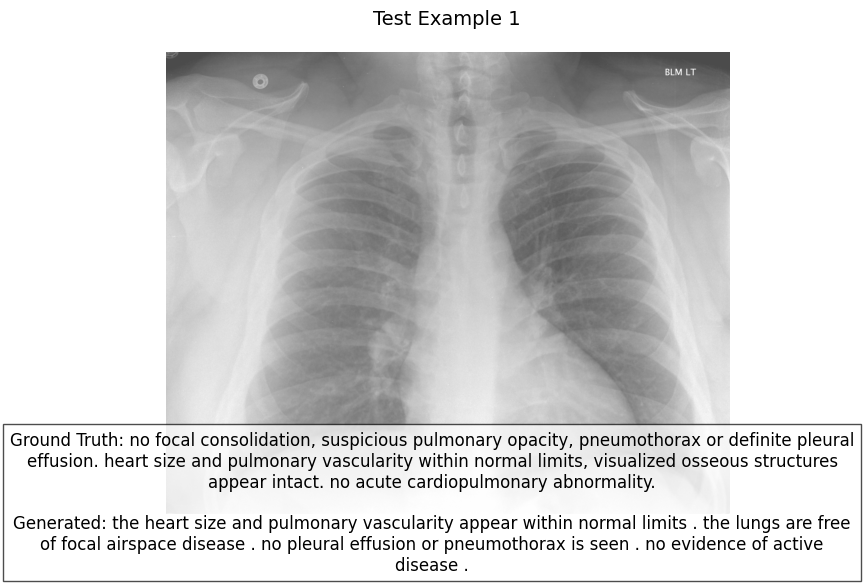

--- Example 2/3 ---


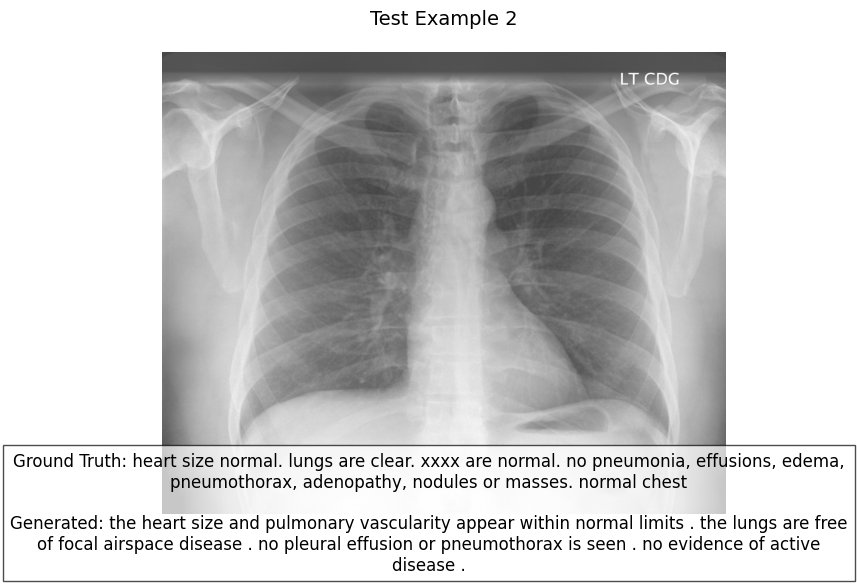

--- Example 3/3 ---


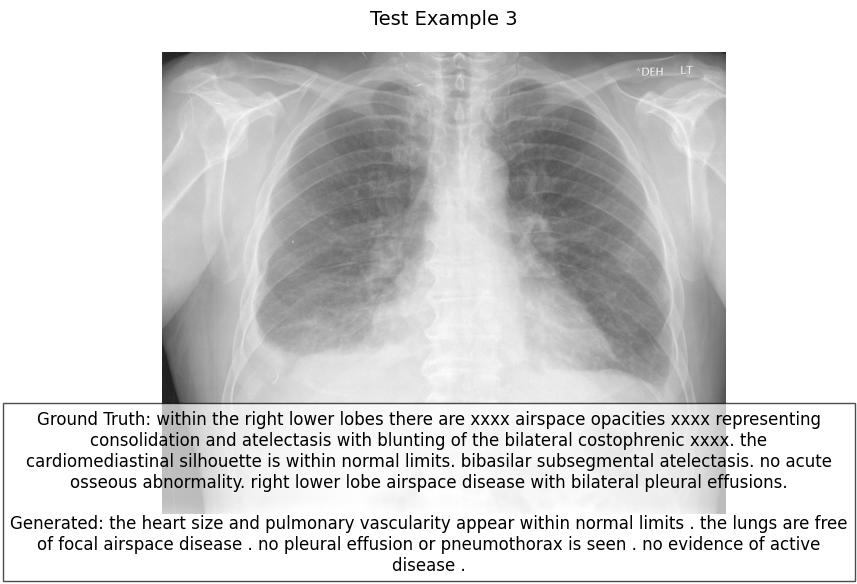

In [53]:
# Main Execution with Early Stopping
def main():
    # Use the already loaded and processed dataframes and tokenizer
    global train_df, val_df, test_df, tokenizer, seq_len

    # Create Datasets and DataLoaders
    train_dataset = MedicalImageDataset(
        image_paths=list(train_df['path']),
        captions_seq=list(train_df['sequence']),
        transform=train_transforms
    )
    val_dataset = MedicalImageDataset(
        image_paths=list(val_df['path']),
        captions_seq=list(val_df['sequence']),
        transform=image_transforms
    )
    test_dataset = MedicalImageDataset(
        image_paths=list(test_df['path']),
        captions_seq=list(test_df['sequence']),
        transform=image_transforms
    )

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, drop_last=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, drop_last=True)

    # Model Parameters
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    embed_dim = 512
    ff_dim = 512
    num_heads = 8
    num_decoder_layers = 4
    max_len = seq_len  # Use the already defined seq_len

    # Initialize Model Components
    cnn_encoder = ImageEncoder(embed_dim=embed_dim).to(device)
    transformer_encoder = TransformerEncoderBlock(embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim).to(device)
    decoder = CaptionDecoder(
        vocab_size=tokenizer.vocab_size,
        embed_dim=embed_dim,
        ff_dim=ff_dim,
        num_heads=num_heads,
        max_len=max_len,
        num_layers=num_decoder_layers
    ).to(device)
    model = ImageCaptioningModel(cnn_encoder, transformer_encoder, decoder, tokenizer).to(device)

    # Optimizer and Scheduler
    cnn_params = list(model.cnn_encoder.backbone[-2:].parameters())
    transformer_params = list(model.transformer_encoder.parameters()) + list(model.decoder.parameters())
    optimizer = torch.optim.Adam([
        {'params': transformer_params, 'lr': 1e-4},
        {'params': cnn_params, 'lr': 1e-5}
    ])
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)

    # Training Loop with Early Stopping
    best_val_loss = float('inf')
    best_model = copy.deepcopy(model.state_dict())
    patience = 5   # stop if no improvement for N epochs
    wait = 0       # counter for patience

    for epoch in range(60):
        train_loss = train_one_epoch(model, train_loader, optimizer, tokenizer.pad_id, device)
        val_loss = evaluate_loss(model, val_loader, tokenizer.pad_id, device)
        scheduler.step(val_loss)

        if val_loss < best_val_loss:
            print("Saving best model...")
            best_val_loss = val_loss
            best_model = copy.deepcopy(model.state_dict())
            wait = 0  # reset patience counter
        else:
            wait += 1
            print(f"No improvement. Early stopping counter: {wait}/{patience}")

        print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        if wait >= patience:
            print("\nEarly stopping triggered. Training stopped.")
            break

    # Load Best Model
    model.load_state_dict(best_model)
    torch.save(model.state_dict(), "medical_report_model.pt")

    # Evaluate on Test Set
    test_metrics = evaluate_model(model, test_loader, tokenizer, device)
    print("\n--- Test Set Evaluation Metrics ---")
    for metric, value in test_metrics.items():
        print(f"{metric.upper():<12}: {value:.4f}")

    # Visualize Random Test Examples
    show_random_test_examples(model, test_df, tokenizer, image_transforms, device, num_examples=3)


if __name__ == "__main__":
    main()

====================================

In [61]:
from google.colab import files
files.download("medical_report_model.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>